In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generating synthetic dataset to simulate process metrics
np.random.seed(42)
data = {
    'ProcessStep': np.random.choice(['Step1', 'Step2', 'Step3', 'Step4'], 500),
    'ProcessingTime': np.random.normal(10, 2, 500).round(2),  # Normally distributed processing times
    'QueueTime': np.random.normal(5, 1.5, 500).round(2),  # Normally distributed queue times
    'MachineDowntime': np.random.poisson(2, 500),  # Poisson distributed machine downtime
    'DefectRate': np.random.beta(2, 5, 500).round(2),  # Beta distributed defect rates
    'ResourceUsage': np.random.randint(50, 100, 500),  # Random resource usage percentage
    'BatchSize': np.random.randint(10, 200, 500)  # Random batch sizes
}

df = pd.DataFrame(data)

In [3]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
       ProcessingTime  QueueTime  MachineDowntime  DefectRate  ResourceUsage  \
count      500.000000  500.00000       500.000000   500.00000     500.000000   
mean         9.986380    5.16290         2.044000     0.29722      73.490000   
std          2.016693    1.48083         1.422009     0.15759      14.479406   
min          3.520000    0.66000         0.000000     0.01000      50.000000   
25%          8.577500    4.17000         1.000000     0.18000      61.000000   
50%          9.980000    5.22500         2.000000     0.28000      74.000000   
75%         11.302500    6.10250         3.000000     0.41000      87.000000   
max         17.710000    8.95000         7.000000     0.81000      99.000000   

        BatchSize  
count  500.000000  
mean   103.300000  
std     55.035368  
min     10.000000  
25%     53.750000  
50%    106.000000  
75%    149.000000  
max    199.000000  


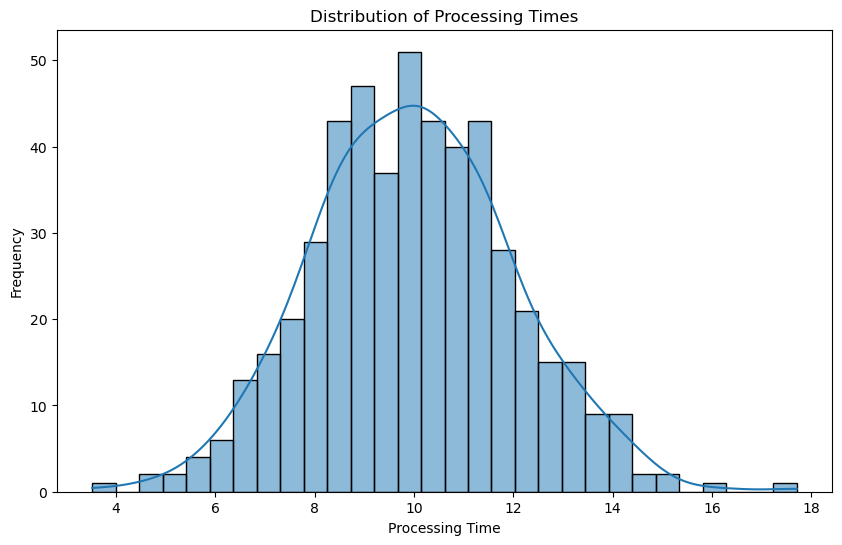

In [4]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['ProcessingTime'], kde=True, bins=30)
plt.title('Distribution of Processing Times')
plt.xlabel('Processing Time')
plt.ylabel('Frequency')
plt.show()

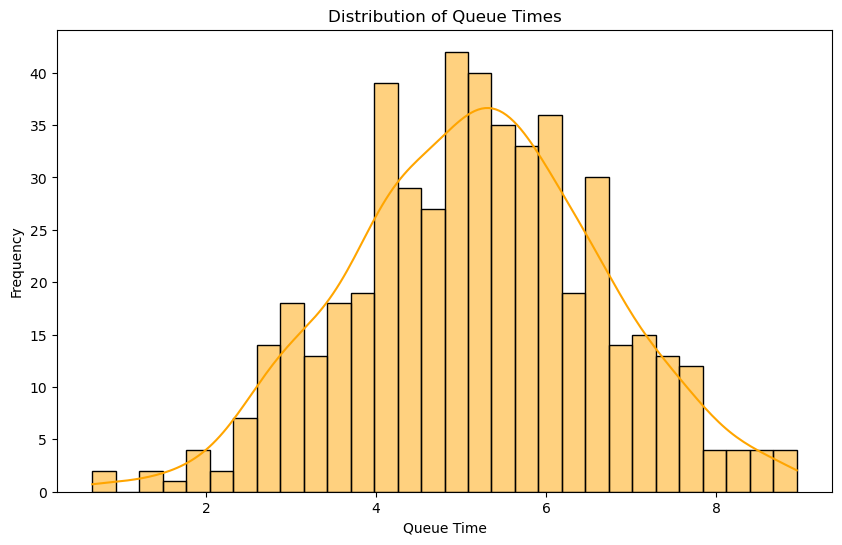

In [5]:

plt.figure(figsize=(10, 6))
sns.histplot(df['QueueTime'], kde=True, bins=30, color='orange')
plt.title('Distribution of Queue Times')
plt.xlabel('Queue Time')
plt.ylabel('Frequency')
plt.show()

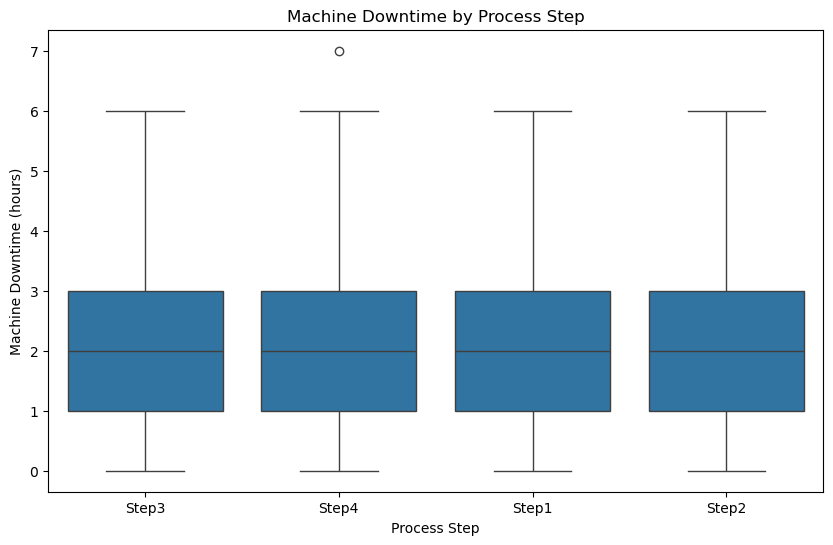

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProcessStep', y='MachineDowntime', data=df)
plt.title('Machine Downtime by Process Step')
plt.xlabel('Process Step')
plt.ylabel('Machine Downtime (hours)')
plt.show()

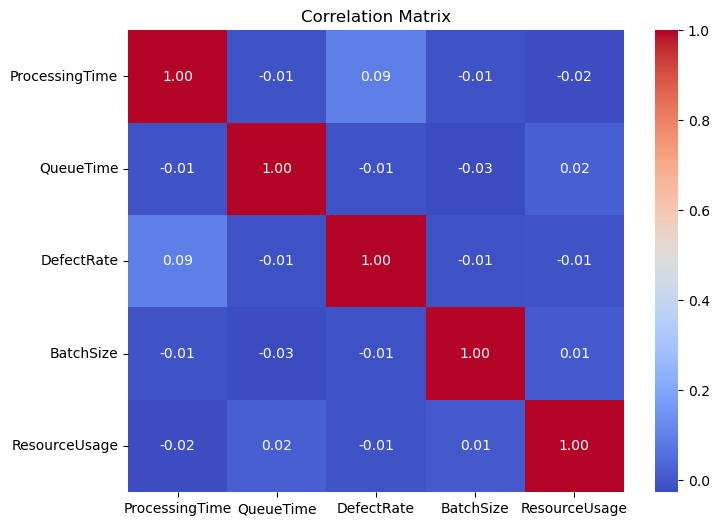

In [7]:

# Correlation analysis
corr = df[['ProcessingTime', 'QueueTime', 'DefectRate', 'BatchSize', 'ResourceUsage']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


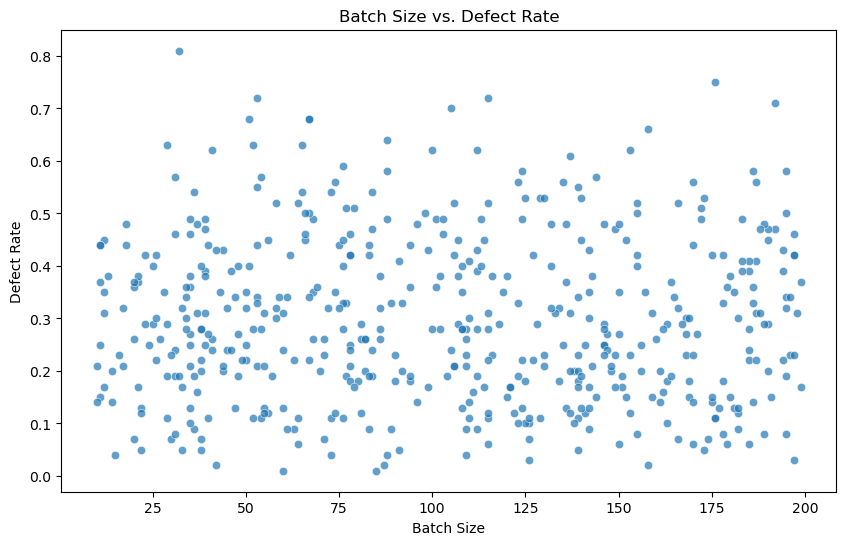

In [8]:
# Scatter plot for batch size vs. defect rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BatchSize', y='DefectRate', data=df, alpha=0.7)
plt.title('Batch Size vs. Defect Rate')
plt.xlabel('Batch Size')
plt.ylabel('Defect Rate')
plt.show()

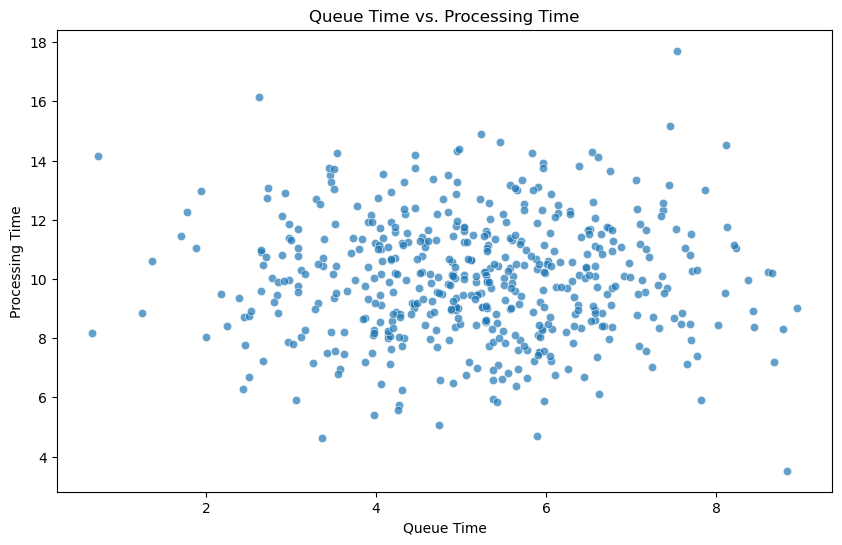

In [9]:
# Scatter plot for queue time vs. processing time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QueueTime', y='ProcessingTime', data=df, alpha=0.7)
plt.title('Queue Time vs. Processing Time')
plt.xlabel('Queue Time')
plt.ylabel('Processing Time')
plt.show()

In [10]:
# Outlier Detection
outliers_downtime = df[df['MachineDowntime'] > df['MachineDowntime'].mean() + 2 * df['MachineDowntime'].std()]
outliers_defect_rate = df[df['DefectRate'] > df['DefectRate'].mean() + 2 * df['DefectRate'].std()]


In [11]:
print("\nOutliers in Machine Downtime:")
print(outliers_downtime)


Outliers in Machine Downtime:
    ProcessStep  ProcessingTime  QueueTime  MachineDowntime  DefectRate  \
5         Step4            7.51       5.92                5        0.31   
36        Step4            9.06       5.26                6        0.32   
45        Step4            8.70       2.45                6        0.25   
50        Step3            8.68       7.50                5        0.31   
81        Step4           10.26       7.72                5        0.42   
84        Step3           12.33       5.95                5        0.44   
107       Step4            8.61       6.58                5        0.42   
108       Step2           11.80       4.94                5        0.35   
137       Step1            7.57       7.18                5        0.14   
186       Step2           14.31       4.95                5        0.57   
190       Step3           14.38       4.98                5        0.25   
195       Step2            8.95       6.57                6        0.

In [12]:

print("\nOutliers in Defect Rate:")
print(outliers_defect_rate)



Outliers in Defect Rate:
    ProcessStep  ProcessingTime  QueueTime  MachineDowntime  DefectRate  \
21        Step1           17.71       7.54                0        0.64   
49        Step2           10.37       6.47                0        0.62   
127       Step1           10.04       2.77                3        0.72   
171       Step1            8.35       5.95                1        0.68   
220       Step3           10.24       5.97                4        0.70   
228       Step1           13.10       5.91                1        0.63   
244       Step3            9.46       2.83                1        0.63   
248       Step1           13.26       3.47                0        0.68   
272       Step4           13.93       5.96                1        0.63   
313       Step3           13.82       6.39                4        0.81   
319       Step2            8.27       5.95                0        0.62   
358       Step1           11.15       5.98                3        0.71   

In [13]:
# Industry standards comparison (hypothetical values)
industry_std_processing_time = 8.5  # hours
industry_std_defect_rate = 0.1  # 10%


In [14]:
print(f"\nCurrent Mean Processing Time: {df['ProcessingTime'].mean():.2f} hours")
print(f"Industry Standard Processing Time: {industry_std_processing_time} hours")



Current Mean Processing Time: 9.99 hours
Industry Standard Processing Time: 8.5 hours


In [15]:
print(f"\nCurrent Mean Defect Rate: {df['DefectRate'].mean():.2%}")
print(f"Industry Standard Defect Rate: {industry_std_defect_rate:.2%}")



Current Mean Defect Rate: 29.72%
Industry Standard Defect Rate: 10.00%
